/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


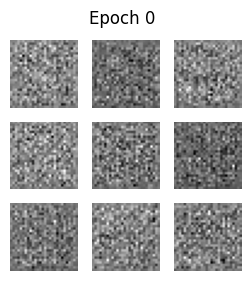

Epoch 0 - D loss 0.6401, acc 85.16% - G loss 0.6939
Epoch 1 - D loss 0.6524, acc 73.83% - G loss 0.6923
Epoch 2 - D loss 0.6560, acc 66.46% - G loss 0.6905
Epoch 3 - D loss 0.6577, acc 61.94% - G loss 0.6888
Epoch 4 - D loss 0.6581, acc 59.05% - G loss 0.6871


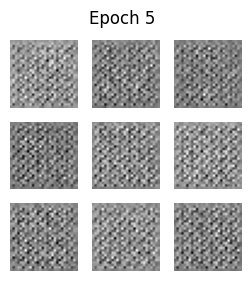

Epoch 5 - D loss 0.6601, acc 57.45% - G loss 0.6854
Epoch 6 - D loss 0.6618, acc 55.86% - G loss 0.6835
Epoch 7 - D loss 0.6637, acc 55.10% - G loss 0.6817
Epoch 8 - D loss 0.6648, acc 54.33% - G loss 0.6797
Epoch 9 - D loss 0.6661, acc 53.72% - G loss 0.6778


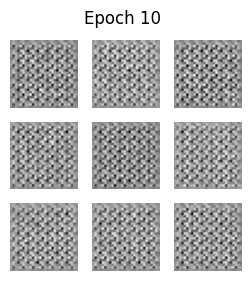

Epoch 10 - D loss 0.6670, acc 53.23% - G loss 0.6758
Epoch 11 - D loss 0.6687, acc 52.42% - G loss 0.6737
Epoch 12 - D loss 0.6693, acc 52.23% - G loss 0.6716
Epoch 13 - D loss 0.6701, acc 52.06% - G loss 0.6694
Epoch 14 - D loss 0.6716, acc 51.71% - G loss 0.6672
Epoch 15 - D loss 0.6728, acc 51.50% - G loss 0.6650
Epoch 16 - D loss 0.6741, acc 51.32% - G loss 0.6627
Epoch 17 - D loss 0.6754, acc 51.07% - G loss 0.6604
Epoch 18 - D loss 0.6765, acc 51.01% - G loss 0.6580
Epoch 19 - D loss 0.6779, acc 50.80% - G loss 0.6557


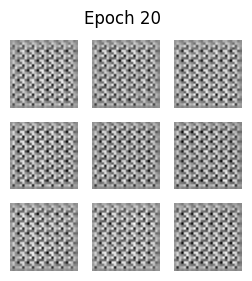

Epoch 20 - D loss 0.6791, acc 50.69% - G loss 0.6533


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

def build_generator():
    m=Sequential()
    m.add(Dense(128*7*7,activation="relu",input_dim=100))
    m.add(Reshape((7,7,128)))
    m.add(Conv2DTranspose(64,4,2,'same')); m.add(LeakyReLU(0.2))
    m.add(Conv2DTranspose(1,4,2,'same',activation='tanh'))
    return m

def build_discriminator():
    m=Sequential()
    m.add(Conv2D(64,3,2,input_shape=(28,28,1),padding='same')); m.add(LeakyReLU(0.2))
    m.add(Flatten()); m.add(Dense(1,activation='sigmoid'))
    return m

def build_gan(g,d):
    d.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5),metrics=['accuracy'])
    d.trainable=False
    gan=Sequential([g,d])
    gan.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
    return gan

def show_images(epoch, g, examples=9):
    noise=np.random.normal(0,1,(examples,100))
    imgs=g.predict(noise,verbose=0)
    imgs=0.5*imgs+0.5
    plt.figure(figsize=(3,3))
    for i in range(examples):
        plt.subplot(3,3,i+1)
        plt.imshow(imgs[i,:,:,0],cmap='gray'); plt.axis('off')
    plt.suptitle(f"Epoch {epoch}")
    plt.show()

def train(epochs=20, batch=64):
    (X,_),_=mnist.load_data()
    X=(X.astype(np.float32)-127.5)/127.5; X=np.expand_dims(X,-1)
    X=X[:5000]  # smaller dataset for speed
    hb=batch//2
    for e in range(epochs+1):
        idx=np.random.randint(0,X.shape[0],hb); real=X[idx]
        noise=np.random.normal(0,1,(hb,100)); fake=g.predict(noise,verbose=0)
        d_loss=0.5*(np.add(d.train_on_batch(real,np.ones((hb,1))),d.train_on_batch(fake,np.zeros((hb,1)))))
        noise=np.random.normal(0,1,(batch,100)); g_loss=gan.train_on_batch(noise,np.ones((batch,1)))
        if e in [0,5,10,20]:
            show_images(e,g)
        print(f"Epoch {e} - D loss {d_loss[0]:.4f}, acc {100*d_loss[1]:.2f}% - G loss {g_loss:.4f}")

g=build_generator(); d=build_discriminator(); gan=build_gan(g,d)
train()


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist

def build_generator():
    return Sequential([
        Dense(128*7*7, activation="relu", input_dim=100),
        Reshape((7,7,128)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(0.2),
        Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh')
    ])

def build_discriminator():
    return Sequential([
        Conv2D(64, kernel_size=3, strides=2, input_shape=(28,28,1), padding='same'),
        LeakyReLU(0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

def train(epochs, batch_size=64, print_interval=100):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32)-127.5)/127.5
    X_train = np.expand_dims(X_train, axis=-1)
    half_batch = batch_size // 2

    for epoch in range(1, epochs+1):
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_imgs = X_train[idx]
        noise = np.random.normal(0,1,(half_batch,100))
        fake_imgs = generator.predict(noise, verbose=0)
        d_loss = 0.5 * (discriminator.train_on_batch(real_imgs, np.ones((half_batch,1))) +
                        discriminator.train_on_batch(fake_imgs, np.zeros((half_batch,1))))
        g_loss = gan.train_on_batch(np.random.normal(0,1,(batch_size,100)), np.ones((batch_size,1)))

        if epoch % print_interval == 0 or epoch==1 or epoch==epochs:
            print(f"Epoch {epoch}/{epochs} | D loss: {d_loss:.4f} | G loss: {g_loss:.4f}")

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002,0.5))
gan = build_gan(generator, discriminator)

train(epochs=1000, batch_size=64, print_interval=100)


Epoch 1/1000 | D loss: 0.7790 | G loss: 0.6914
Epoch 100/1000 | D loss: 0.8773 | G loss: 0.4982
Epoch 200/1000 | D loss: 1.0240 | G loss: 0.3732
Epoch 300/1000 | D loss: 1.1714 | G loss: 0.2915
Epoch 400/1000 | D loss: 1.2870 | G loss: 0.2409
Epoch 500/1000 | D loss: 1.3755 | G loss: 0.2073
Epoch 600/1000 | D loss: 1.4454 | G loss: 0.1834
Epoch 700/1000 | D loss: 1.5020 | G loss: 0.1655
Epoch 800/1000 | D loss: 1.5490 | G loss: 0.1515
Epoch 900/1000 | D loss: 1.5891 | G loss: 0.1402
Epoch 1000/1000 | D loss: 1.6244 | G loss: 0.1309


In [4]:
import numpy as np
from keras.datasets import fashion_mnist
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


0 [D:0.7207] [G:0.6941]


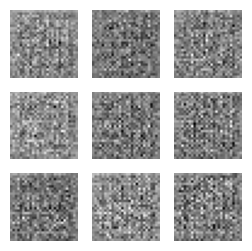

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam
(X_train,_),(_,_) = fashion_mnist.load_data()
X_train = (X_train.astype(np.float32)-127.5)/127.5
X_train = np.expand_dims(X_train, axis=-1)
latent_dim = 100
batch_size = 64
sample_interval = 2000
G = Sequential([
    Dense(128*7*7, input_shape=(latent_dim,), activation='relu'),
    Reshape((7,7,128)),
    Conv2DTranspose(128,4,strides=2,padding='same',activation='relu'),
    Conv2DTranspose(64,4,strides=2,padding='same',activation='relu'),
    Conv2DTranspose(1,7,activation='tanh',padding='same')
])
D = Sequential([
    Conv2D(64,3,strides=2,padding='same',input_shape=(28,28,1)),
    LeakyReLU(0.2),
    Conv2D(128,3,strides=2,padding='same'),
    LeakyReLU(0.2),
    Flatten(),
    Dense(1,activation='sigmoid')
])
D.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5),metrics=['accuracy'])
D.trainable = False
from keras.models import Model
from keras.layers import Input
z = Input(shape=(latent_dim,))
GAN = Model(z,D(G(z)))
GAN.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
valid = np.ones((batch_size,1))
fake = np.zeros((batch_size,1))
for e in range(10000):
    idx = np.random.randint(0,X_train.shape[0],batch_size)
    imgs = X_train[idx]
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    gen_imgs = G.predict(noise,verbose=0)
    d_loss = 0.5*(D.train_on_batch(imgs,valid)[0]+D.train_on_batch(gen_imgs,fake)[0])
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    g_loss = GAN.train_on_batch(noise,valid)
    if e % sample_interval == 0:
        print(f"{e} [D:{d_loss:.4f}] [G:{g_loss:.4f}]")
        s = np.random.normal(0,1,(9,latent_dim))
        g = G.predict(s,verbose=0); g = 0.5*g+0.5
        plt.figure(figsize=(3,3))
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(g[i,:,:,0],cmap='gray')
            plt.axis('off')
        plt.show()
